# Visualizing the Distribution of Startup Funding

Numbers are hard to understand by themselves. Visualizations help us see patterns. We'll create histograms and boxplots to understand how funding amounts are actually distributed across startups, what's typical, and what's extreme.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/startup_funding.csv")

funding_numeric = (
    df["Amount in USD"]
    .astype(str)
    .str.replace(",", "", regex=True)
)

funding_numeric = pd.to_numeric(funding_numeric, errors="coerce")

df_funding = df.loc[funding_numeric.notna()].copy()
df_funding["Amount in USD"] = funding_numeric[funding_numeric.notna()]

Load and clean the data the same way as before so we have numeric funding amounts ready for visualization.

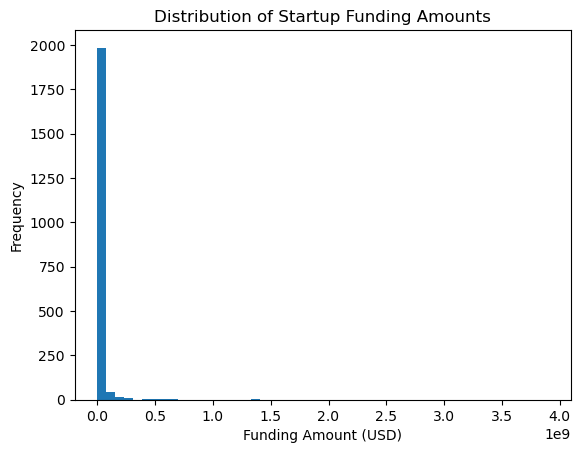

In [2]:
plt.figure()
plt.hist(df_funding["Amount in USD"], bins=50)
plt.xlabel("Funding Amount (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Startup Funding Amounts")
plt.show()

This histogram shows how many startups fall into each funding bucket. Watch for the shape: if it's skewed to the left with a long tail on the right, that means most startups get small amounts and only a few get huge ones. This is typical of real-world startup funding.

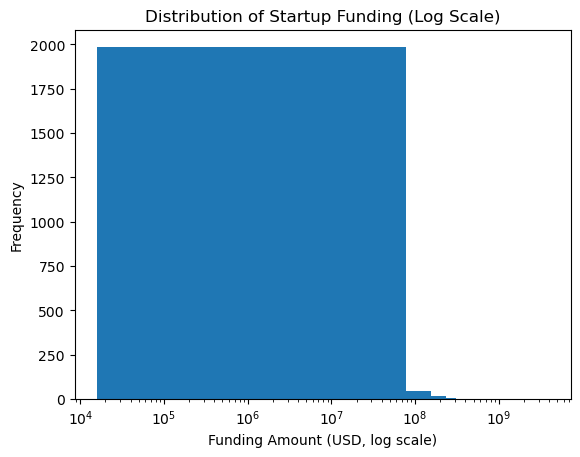

In [3]:
plt.figure()
plt.hist(df_funding["Amount in USD"], bins=50)
plt.xscale("log")
plt.xlabel("Funding Amount (USD, log scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Startup Funding (Log Scale)")
plt.show()

The same histogram but on a log scale. This stretches out the small values and compresses the large ones, making the distribution look more balanced and easier to read. The log scale doesn't change the data, just how we view it. It helps us see patterns in both tiny seed rounds and mega-rounds on the same chart.

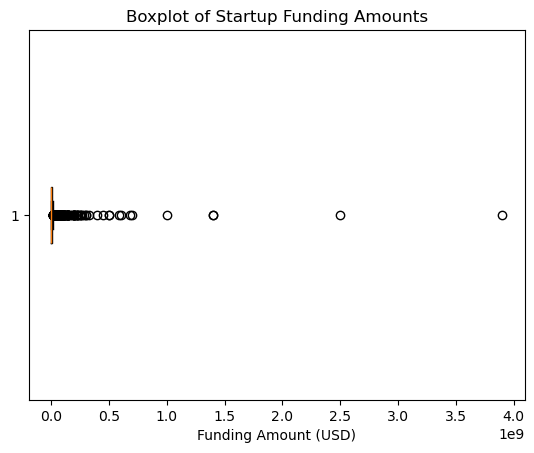

In [4]:
plt.figure()
plt.boxplot(df_funding["Amount in USD"], vert=False)
plt.xlabel("Funding Amount (USD)")
plt.title("Boxplot of Startup Funding Amounts")
plt.show()

The boxplot is a different way to show distribution. The box shows where the middle 50% of startups sit (Q1 to Q3), the line inside is the median, and those dots or asterisks floating above are the outliers. This boxplot includes all data, so the outliers spread far from the box, showing how extreme some funding amounts are.

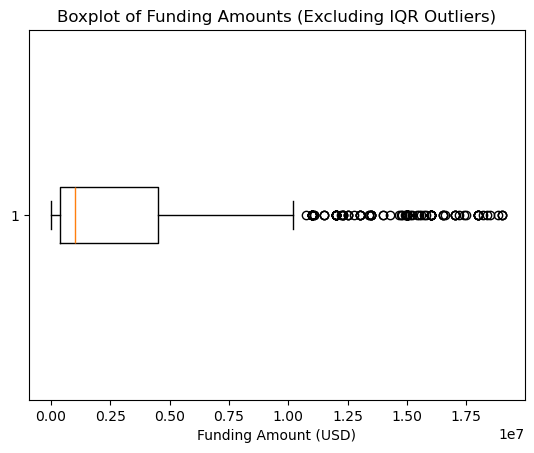

In [5]:
Q1 = df_funding["Amount in USD"].quantile(0.25)
Q3 = df_funding["Amount in USD"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

plt.figure()
plt.boxplot(
    df_funding[df_funding["Amount in USD"] <= upper_bound]["Amount in USD"],
    vert=False
)
plt.xlabel("Funding Amount (USD)")
plt.title("Boxplot of Funding Amounts (Excluding IQR Outliers)")
plt.show()

This is the same boxplot concept but without the mega-round outliers. Now the box is bigger and cleaner because we're only looking at what's typical. This shows what funding distribution actually looks like for most startups, without the noise from rare extreme rounds.

## What We See in These Charts

The story is clear: startup funding is heavily skewed. Most companies get small amounts, and only a handful get massive rounds. The histograms show this shape, the log scale helps us see detail at both ends, and the boxplots confirm it visually. By comparing the full boxplot to the filtered one, we see just how much those few mega-rounds stand out. When talking to other founders, use the filtered view as reality and the full view as a reminder that outliers exist but don't define the typical experience.